In [1]:
import random as aleas  # pour generer des nombres aleatoires et +
import matplotlib.pyplot as plt # pour les graphiques
from scipy.signal import freqz   # pour avoir le TF de l'autocorrelation
import numpy as np #pour gerer les moyennes + covariances +++

import csv
import pandas as pd

In [2]:
data = []
title_name = []
cpt = 0
with open('crime.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    fieldnames = reader.fieldnames

    for row in reader:
        if(cpt != 0):
            cpt+=1
        else:
            data.append(row)


In [3]:
# How has crime changed over the years?
# Is it possible to predict where or when a crime will be committed?
# Which areas of the city have evolved over this time span?
# In which area most crimes are committed?

In [4]:
#Analyse temporelle (année, mois)
year2015 = []
year2016 = []
year2017 = []
year2018 = []
years = [year2015,year2016,year2017,year2018]
for c in data:
    if(c["YEAR"] == "2015"):
        year2015.append(c)
    elif(c["YEAR"] == "2016"):
        year2016.append(c)
    elif(c["YEAR"] == "2017"):
        year2017.append(c)
    elif(c["YEAR"] == "2018"):
        year2018.append(c)

#print(year2018)

nb_crime2015 = len(year2015)
nb_crime2016 = len(year2016)
nb_crime2017 = len(year2017)
nb_crime2018 = len(year2018)

nb_crime = [nb_crime2015, nb_crime2016, nb_crime2017,nb_crime2018]

years_nb = [2015,2016,2017,2018]
crime_year = {}
for y in years_nb:
    crime_year[str(y)] = nb_crime[years_nb.index(y)]


In [38]:
total_years = []
for y in range(4):
    total_years.append([])
    for m in range(12):
        total_years[y].append([])

for c in data:
    if(c["YEAR"] == "2015"):
        total_years[0][int(c["MONTH"])-1].append(c)
    elif(c["YEAR"] == "2016"):
        total_years[1][int(c["MONTH"])-1].append(c)
    elif(c["YEAR"] == "2017"):
        total_years[2][int(c["MONTH"])-1].append(c)
    elif(c["YEAR"] == "2018"):
        total_years[3][int(c["MONTH"])-1].append(c)

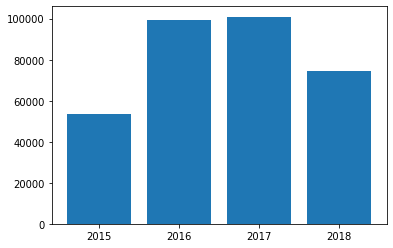

In [6]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.bar(crime_year.keys(), crime_year.values())
plt.show()

In [7]:
#Analyse par district
def get_crime_district(data):
    crime_district = {}
    districts = {}
    for c in data:
        if(c["DISTRICT"] != ""):
            if(not c["DISTRICT"] in crime_district):
                crime_district[c["DISTRICT"]] = 0
                districts[c["DISTRICT"]] = []
            crime_district[c["DISTRICT"]] += 1
            districts[c["DISTRICT"]].append(c)
    crime_district = {k: v for k, v in sorted(crime_district.items(), key=lambda item: item[1])}
    return crime_district, districts

crime_district, districts = get_crime_district(data)

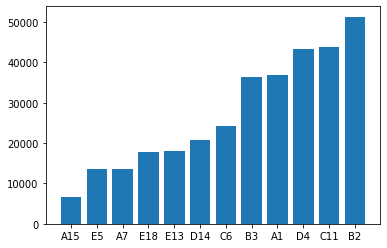

In [8]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.bar(crime_district.keys(), crime_district.values())
plt.show()

In [9]:
#Analyse par types (Offense Code group)
def get_5_most_crime_type(data):
    list_top_crime = []
    crime_type = {}

    top_5 = {}

    for d in data:
        if d["OFFENSE_CODE_GROUP"] in crime_type:
            crime_type[d["OFFENSE_CODE_GROUP"]] += 1
        else:
            crime_type[d["OFFENSE_CODE_GROUP"]] = 1
        
    crime_type = {k: v for k, v in sorted(crime_type.items(), key=lambda item: item[1], reverse = True)}

    top5_crime_type = dict(list(crime_type.items())[:5])

    for keys in top5_crime_type.keys():
        top_5[keys] = []

    for d in data:
        if d["OFFENSE_CODE_GROUP"] in top_5:
            top_5[d["OFFENSE_CODE_GROUP"]].append(d)

    return top5_crime_type, top_5

top5_crime_type, top_5 = get_5_most_crime_type(data)


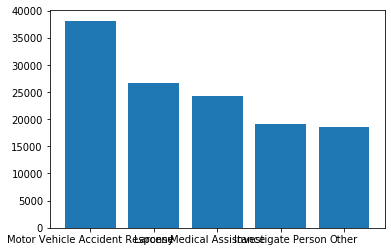

In [10]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

top5_crime_type, top_5 = get_5_most_crime_type(data)

plt.bar(top5_crime_type.keys(), top5_crime_type.values())
plt.show()

In [11]:
#Analyse des crimes par district en fonction des années
crime_district_annee = []
crime_district_month = []
for ys in years:
    crime_district, districts = get_crime_district(ys)
    crime_district_annee.append(crime_district)

"""
for ys in total_years:
    for ms in ys:
        crime_district, districts = get_crime_district(ms)
        crime_district_month.append(crime_district)
"""

'\nfor ys in total_years:\n    for ms in ys:\n        crime_district, districts = get_crime_district(ms)\n        crime_district_month.append(crime_district)\n'

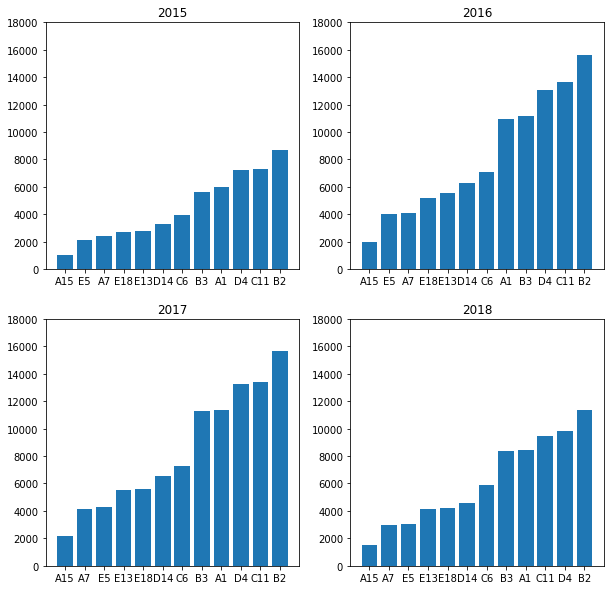

"\nfig = plt.figure(figsize = (35,20))\nfig.patch.set_facecolor('xkcd:white')\n\ncpt = 0\nfor cdm in crime_district_month:\n    cpt += 1\n    ax = plt.subplot(4,12,cpt)\n    ax = plt.ylim(0,2000)\n    ax = plt.bar(cdm.keys(), cdm.values())\n"

In [12]:
fig = plt.figure(figsize = (10,10))

fig.patch.set_facecolor('xkcd:white')
cpt = 0
for cda in crime_district_annee:
    cpt += 1
    ax = plt.subplot(2,2,cpt)
    ax = plt.ylim(0,18000)
    ax = plt.bar(cda.keys(), cda.values())
    ax = plt.title(years_nb[crime_district_annee.index(cda)])

plt.show()
"""
fig = plt.figure(figsize = (35,20))
fig.patch.set_facecolor('xkcd:white')

cpt = 0
for cdm in crime_district_month:
    cpt += 1
    ax = plt.subplot(4,12,cpt)
    ax = plt.ylim(0,2000)
    ax = plt.bar(cdm.keys(), cdm.values())
"""

In [13]:
#Analyse des types de crimes en fonction des années
crime_type_annee = []
for ys in years:
    top5_crime_type, top_5 = get_5_most_crime_type(ys)
    crime_type_annee.append(top5_crime_type)

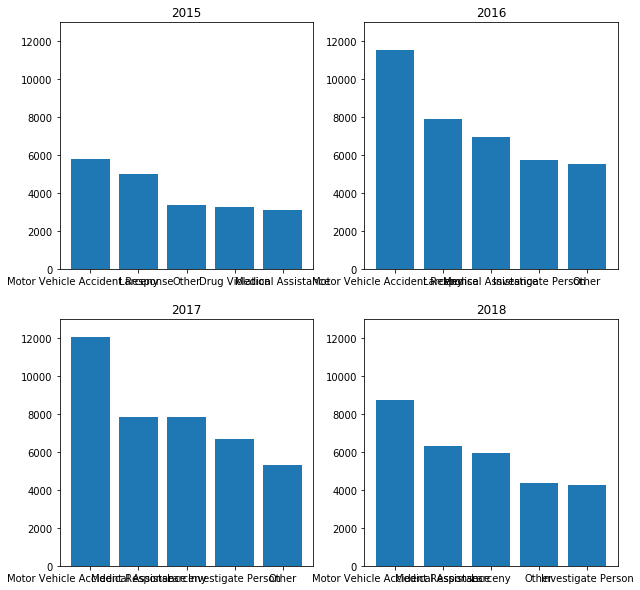

In [14]:
fig = plt.figure(figsize = (10,10))
fig.patch.set_facecolor('xkcd:white')
cpt = 0

for cda in crime_type_annee:
    cpt += 1
    ax = plt.subplot(2,2,cpt)
    ax = plt.ylim(0,13000)
    ax = plt.bar(cda.keys(), cda.values())
    ax = plt.title(years_nb[crime_type_annee.index(cda)])

plt.show()

In [15]:
#Analyse des types d'infractions par district
crime_type_district = []
crime_district, districts = get_crime_district(data)
for ds in districts.values():
    top5_crime_type, top_5 = get_5_most_crime_type(ds)
    crime_type_district.append(top5_crime_type)

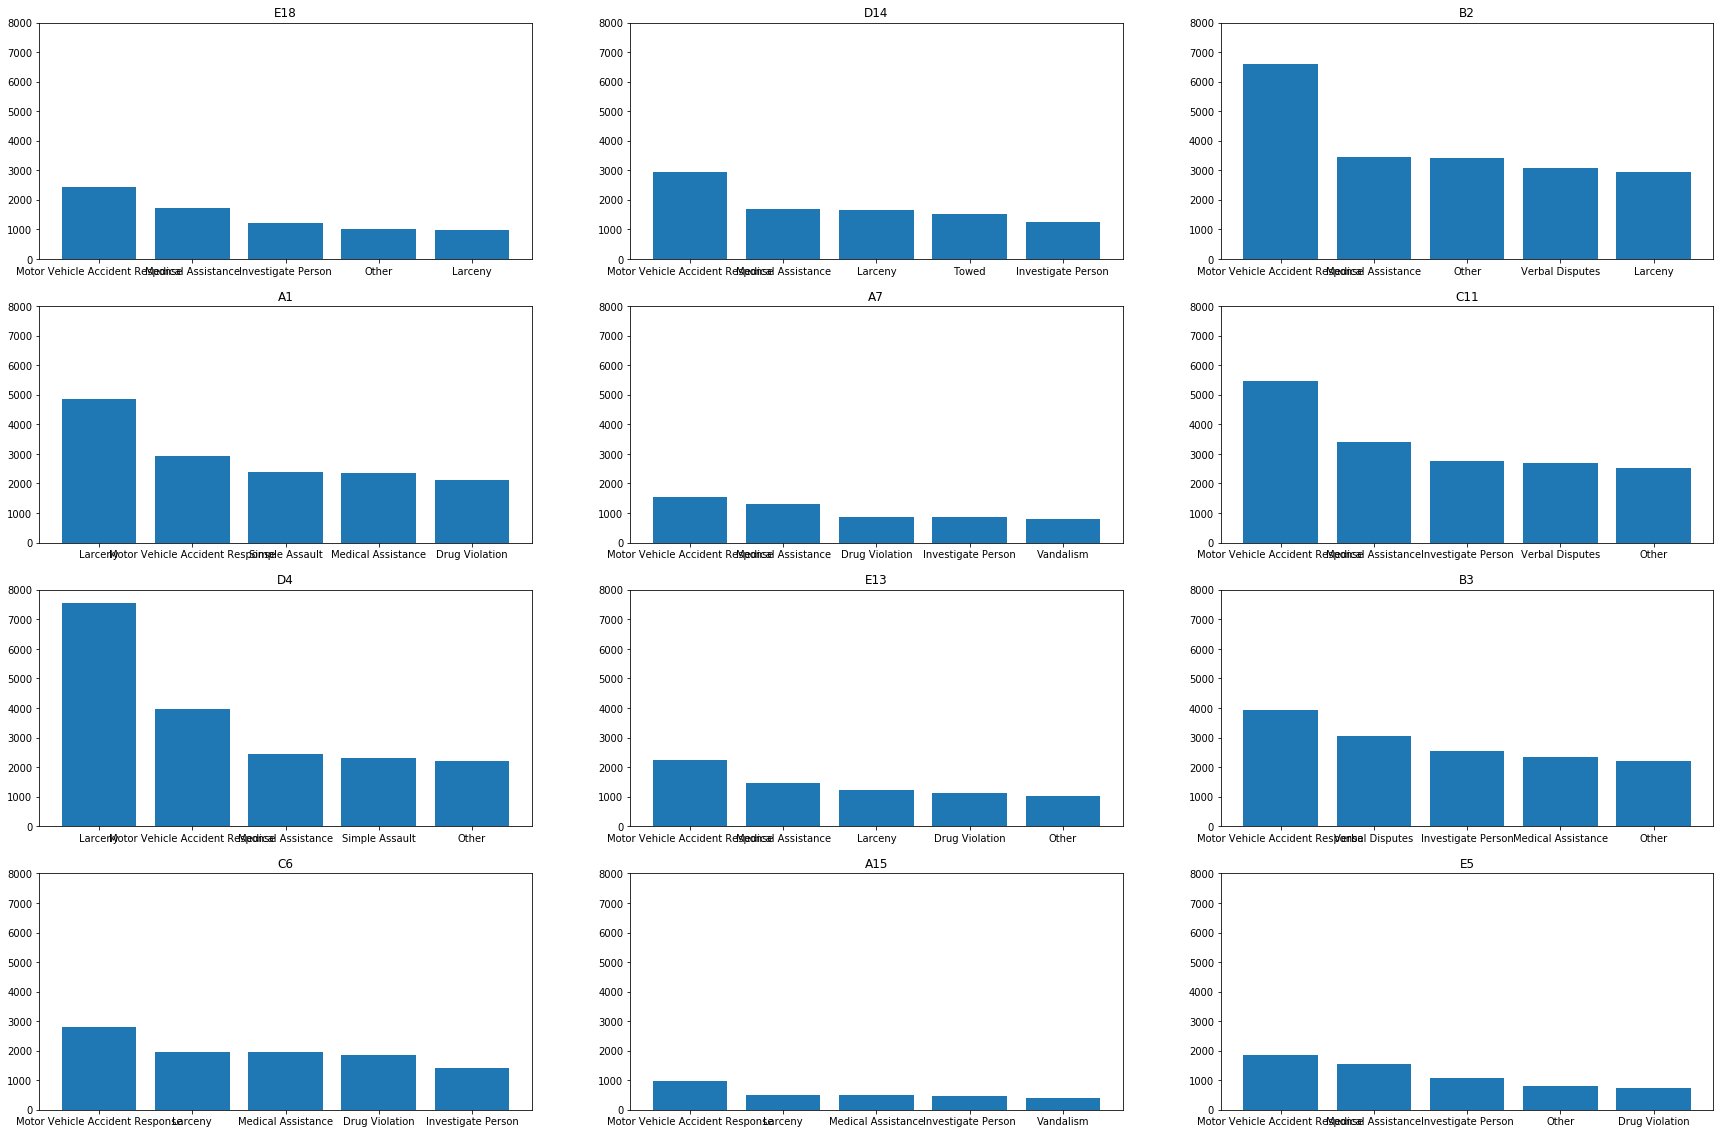

In [16]:
fig = plt.figure(figsize = (30,20))
fig.patch.set_facecolor('xkcd:white')
cpt = 0
for ctd in crime_type_district:
    cpt += 1
    ax = plt.subplot(4,3,cpt)
    ax = plt.ylim(0,8000)
    ax = plt.bar(ctd.keys(), ctd.values())
    ax = plt.title(list(districts.keys())[crime_type_district.index(ctd)])

plt.show()

In [17]:
# Which areas of the city have evolved over this time span?
#Prendre les données de chaque district par années et faire un graph qui montre la différence en 2018 et 2015.
diff_crime_district = {}

crime_district2015, districts2015 = get_crime_district(years[1])
#print(crime_district2015)
crime_district2018, districts2018 = get_crime_district(years[3])

for ds2015 in districts2015:
    #print(ds2015)
    for ds2018 in districts2018:
        if ds2015 == ds2018:
            diff_crime_district[ds2015] = (crime_district2018[ds2018] - crime_district2015[ds2015])

print(diff_crime_district)




{'E18': -980, 'C11': -4131, 'B2': -4219, 'D4': -3270, 'B3': -2764, 'C6': -1225, 'E13': -1455, 'E5': -961, 'A1': -2481, 'A15': -506, 'D14': -1663, 'A7': -1171}


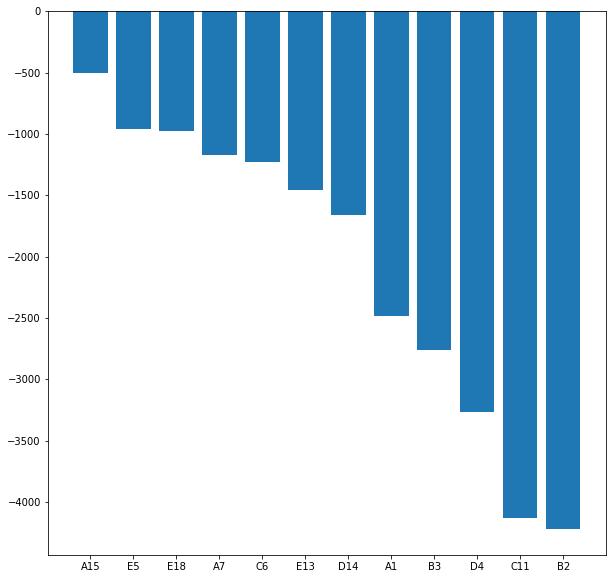

In [18]:
fig = plt.figure(figsize = (10,10))
fig.patch.set_facecolor('xkcd:white')

diff_crime_district = {k: v for k, v in sorted(diff_crime_district.items(), key=lambda item: item[1], reverse = True)}

plt.bar(diff_crime_district.keys(), diff_crime_district.values(), )
#ax = plt.title(years_nb[crime_district_annee.index(cda)])

plt.show()

In [42]:
# Correlation des infractions sur les mois de l'année entre deux districts

crime_district_month = []

for ys in total_years:
    for ms in ys:
        crime_district, districts = get_crime_district(ms)
        crime_district_month.append(districts)
print(crime_district_month)
#Données district B2
crime_b2_month = {}
for cdm in crime_district_month:
    print(cdm)
    if(cdm["DISTRICT"] == "B2"):
        if(not cdm["MONTH"] in crime_b2_month):
            crime_b2_month[cdm["MONTH"]] = []
        crime_b2_month[cdm["MONTH"]].append(cdm)



#Données district C11
crime_c11_month = {}
for cdm in crime_district_month:
    if(cdm["DISTRICT"] == "C11"):
        if(not cdm["MONTH"] in crime_c11_month):
            crime_c11_month[cdm["MONTH"]] = []
        crime_c11_month[cdm["MONTH"]].append(cdm)
print(crime_c11_month)

certaines infraction peuvent avoir des corrélation d'autres pas du tout
voir corrélation entre infraction et district
corrélation entre temps et infraction (hivers/été d'une année a l'autre)

ex: aux us, quand il y a une attaque pistolet college lycée -> souvent une autre -> puis pas d'autres pdt un moment
-> passage à l'act

contabiliser non d'incident
voir corrélation entre district -> récupérer données de 2018 -> calcul de corrélation entre 2 districts
10 incident dans le mois de janvier dans district 1 -> aussi district 2 ?
pareil sur corrélation entre mois

calculer coef corrélation entre district sur les mois

différence entre 2015 - 2018 
affiner -> phénomene causant l'augmentation ou diminution -> achat voiture/plus de personne/catastrophe...
ex : crise covid -> 1année où l'utilisation des véhicules a dimuniés

np.correlate(data1, data2, "full")